# Gamestate Tactical Analytics Toolkit
## SkillCorner × PySport Analytics Cup Submission

**Author:** Hamza Adhnan Shakir  
**Date:** December 2025  
**Repository:** [github.com/hamza-shakir/analytics_cup_analyst](https://github.com/hamza-shakir/analytics_cup_analyst)

---

## 1. The Problem

When the scoreline changes, tactics change. But how?

Taking the lead provides structural advantage—teams can sit deeper, absorb pressure, exploit transitions. Conceding forces urgency—opponents push higher, commit bodies forward, accept defensive risk. What's overlooked is the duality: both sides adapt simultaneously.

The team that scores faces a choice: maintain aggression or shift to game management? The trailing team confronts mounting pressure: maintain structure or abandon shape in desperation? Responses vary dramatically.

Standard analytics miss this. Whole-match averages treat 90 minutes as uniform. Even basic game state splits barely scratch the surface.

This toolkit provides granularity: **in-possession vs out-of-possession phases**, **time-segmented analysis**, **score-differential contexts**. Instant segmentation revealing how teams *actually* respond under pressure.

## 2. What This Toolkit Does

Instead of whole-match averages, analyze teams in their **actual tactical context**:

How It Works: **Segments → Filters (optional) → Metrics → Plots**

#### 1. **Segments** — Extract tactical periods
- `get_full_match()` — Full match data
- `segment_by_game_state()` — Split by score differential
- `segment_by_time_window()` — Define custom time periods
- `segment_around_goal()` — Isolate moments before/after goals

#### 2. **Filters** — Refine by conditions (compose for specific scenarios)
- `filter_by_ip_phase()` — In-possession phases
- `filter_by_oop_phase()` — Out-of-possession phases
- `filter_by_pitch_third()` — Defensive, middle, or attacking thirds

#### 3. **Metrics** — Calculate tactical statistics
- `average_positions()` — Mean player locations per team/formation
- `team_compactness()` — Width and depth of team shape
- `defensive_line_height()` — Depth of defensive block
- `channel_progression()` — Ball progression through left/center/right

#### 4. **Plots** — Visualize findings
- `plot_average_positions()` — Team formation heatmaps
- `plot_phase_comparison()` — Side-by-side tactical comparison
- `plot_game_state_evolution()` — Metrics evolution over match time
- `plot_team_compactness()` — Width/depth progression
- `plot_defensive_line()` — Defensive line depth evolution
- `plot_channel_progression()` — Attacking pattern distribution

**Result:** Answer practical tactical questions instantly. Coaching staff can now ask: *"How deep did our defensive line sit when 1-0 up vs 2-1 up?"* or *"Did we defend tighter after conceding?"* and get quantified answers in seconds - width, depth, defensive line height, attacking patterns - without hours of manual video review.

Here's proof via analysis of Auckland FC vs Wellington Phoenix (opendata provided by Skillcorner)...

## 3. Live Demonstration: Auckland FC vs Wellington Phoenix

**Match context:** Auckland won 2-1. Let's first see how the score evolved:

In [1]:
import gamestate as gs

# Load match and display score progression
match_id = 1899585

# Show how the score evolved throughout the match
score_prog = gs.score_progression(match_id=match_id)
score_prog

,home_team.name,home_team_score,away_team_score,away_team.name,minute_start,frame_start
0,Auckland FC,0,0,Wellington Phoenix FC,0,12
1,Auckland FC,1,0,Wellington Phoenix FC,31,18940
2,Auckland FC,2,0,Wellington Phoenix FC,69,44380
3,Auckland FC,2,1,Wellington Phoenix FC,81,51899


```
Score Progression for Match 1899585:
0-0  | 0-31 min   (31 min duration)
1-0  | 31-69 min  (38 min duration)
2-0  | 69-81 min  (12 min duration)
2-1  | 81-90 min  (9 min duration)
```

This score progression provides ideal conditions for analyzing tactical responses to changing game states.

In [2]:
import matplotlib.pyplot as plt

# Now segment the match into key phases based on score changes

# Phase 1: 0-0 (both teams executing original game plans)
baseline = gs.segment_by_time_window(match_id=match_id, start_minute=0, end_minute=31)

# Phase 2: 1-0 Auckland (38 minutes of comfortable lead)
one_nil_lead = gs.segment_by_time_window(match_id=match_id, start_minute=31, end_minute=69)

# Phase 3: 2-1 Auckland (final 9 minutes after Wellington scored)
nervous_lead = gs.segment_by_time_window(match_id=match_id, start_minute=81, end_minute=90)

### Discovery 1: Auckland's Strategic Adjustment

When Auckland took the lead, how did their tactics change?

In [3]:
# Compare Auckland's tactical metrics between baseline (0-0) and established lead (1-0)

# Calculate team shape metrics for baseline phase
comp_baseline = gs.team_compactness(segment=baseline, team='home', match_id=match_id, possession='ip')
line_baseline = gs.defensive_line_height(segment=baseline, team='home', match_id=match_id, possession='ip')
chan_baseline = gs.channel_progression(segment=baseline, team='home', match_id=match_id)

# Calculate same metrics for 1-0 lead phase
comp_one_nil = gs.team_compactness(segment=one_nil_lead, team='home', match_id=match_id, possession='ip')
line_one_nil = gs.defensive_line_height(segment=one_nil_lead, team='home', match_id=match_id, possession='ip')
chan_one_nil = gs.channel_progression(segment=one_nil_lead, team='home', match_id=match_id)

# Display comparison
print("Auckland 0-0:")
print(f"  Width: {comp_baseline['width']:.1f}m | Depth: {comp_baseline['depth']:.1f}m | Def Line: {line_baseline['avg_defensive_line_x']:.1f}m")
print(f"  Channels - L:{chan_baseline['left_pct']:.0f}% C:{chan_baseline['center_pct']:.0f}% R:{chan_baseline['right_pct']:.0f}%")

print("\nAuckland 1-0:")
print(f"  Width: {comp_one_nil['width']:.1f}m | Depth: {comp_one_nil['depth']:.1f}m | Def Line: {line_one_nil['avg_defensive_line_x']:.1f}m")
print(f"  Channels - L:{chan_one_nil['left_pct']:.0f}% C:{chan_one_nil['center_pct']:.0f}% R:{chan_one_nil['right_pct']:.0f}%")

Auckland 0-0:
  Width: 39.7m | Depth: 29.1m | Def Line: -7.0m
  Channels - L:26% C:39% R:34%

Auckland 1-0:
  Width: 39.2m | Depth: 53.8m | Def Line: -12.3m
  Channels - L:39% C:28% R:33%


```
Auckland 0-0:
  Width: 39.7m | Depth: 29.1m | Def Line: -7.0m
  Channels - L:26% C:39% R:34%

Auckland 1-0:
  Width: 39.2m | Depth: 53.8m | Def Line: -12.3m
  Channels - L:39% C:28% R:33%
```

**Insight:** Auckland's tactical response was immediate. While they maintained team width (39.7m → 39.2m), they doubled their depth (29.1m → 53.8m), stretching the pitch vertically. Their defensive line dropped 5 meters deeper (-7.0m → -12.3m), and they shifted from central penetration (39%) to wider attacks (72% combined wings). This is a coached adjustment: make the pitch big, control possession wide, force opponents to commit forward, whilst also having enough bodies to prevent counter-attacks.

### Discovery 2: Wellington's Desperation Arc

How did Wellington respond as the deficit grew?

In [4]:
# Track Wellington's tactical evolution across three phases as deficit grows

# Segment Wellington's phases
wellington_baseline = gs.segment_by_time_window(match_id=match_id, start_minute=0, end_minute=31)
wellington_one_down = gs.segment_by_time_window(match_id=match_id, start_minute=31, end_minute=69)
wellington_two_down = gs.segment_by_time_window(match_id=match_id, start_minute=69, end_minute=81)
wellington_chasing = gs.segment_by_time_window(match_id=match_id, start_minute=81, end_minute=90)

# Collect phases and labels for loop
phases = [wellington_baseline, wellington_one_down, wellington_two_down, wellington_chasing]
labels = ["0-0", "0-1 Down", "0-2 Down", "1-2 Chasing"]
# Calculate and display metrics for each phase
for phase, label in zip(phases, labels):
    comp = gs.team_compactness(segment=phase, team='away', match_id=match_id, possession='ip')
    line = gs.defensive_line_height(segment=phase, team='away', match_id=match_id, possession='ip')
    channel_prog = gs.channel_progression(segment=phase, team='away', match_id=match_id)
    print(f"\nWellington {label}")
    print(f"Width: {comp['width']:.1f}m | Def Line: {line['avg_defensive_line_x']:.1f}m")
    print(f"Channels - L:{channel_prog['left_pct']:.0f}% C:{channel_prog['center_pct']:.0f}% R:{channel_prog['right_pct']:.0f}%")


Wellington 0-0
Width: 38.4m | Def Line: -20.0m
Channels - L:29% C:25% R:45%

Wellington 0-1 Down
Width: 39.2m | Def Line: -24.1m
Channels - L:12% C:37% R:51%

Wellington 0-2 Down
Width: 43.1m | Def Line: -15.2m
Channels - L:52% C:22% R:27%

Wellington 1-2 Chasing
Width: 35.2m | Def Line: -19.1m
Channels - L:24% C:75% R:1%


```
Wellington 0-0: Width 38.4m | Def Line -20.0m
Wellington 0-1 Down: Width 39.2m | Def Line -24.1m
Wellington 0-2 Down: Width 43.1m | Def Line -15.2m
Wellington 1-2 Chasing: Width 35.2m | Def Line -19.1m
```

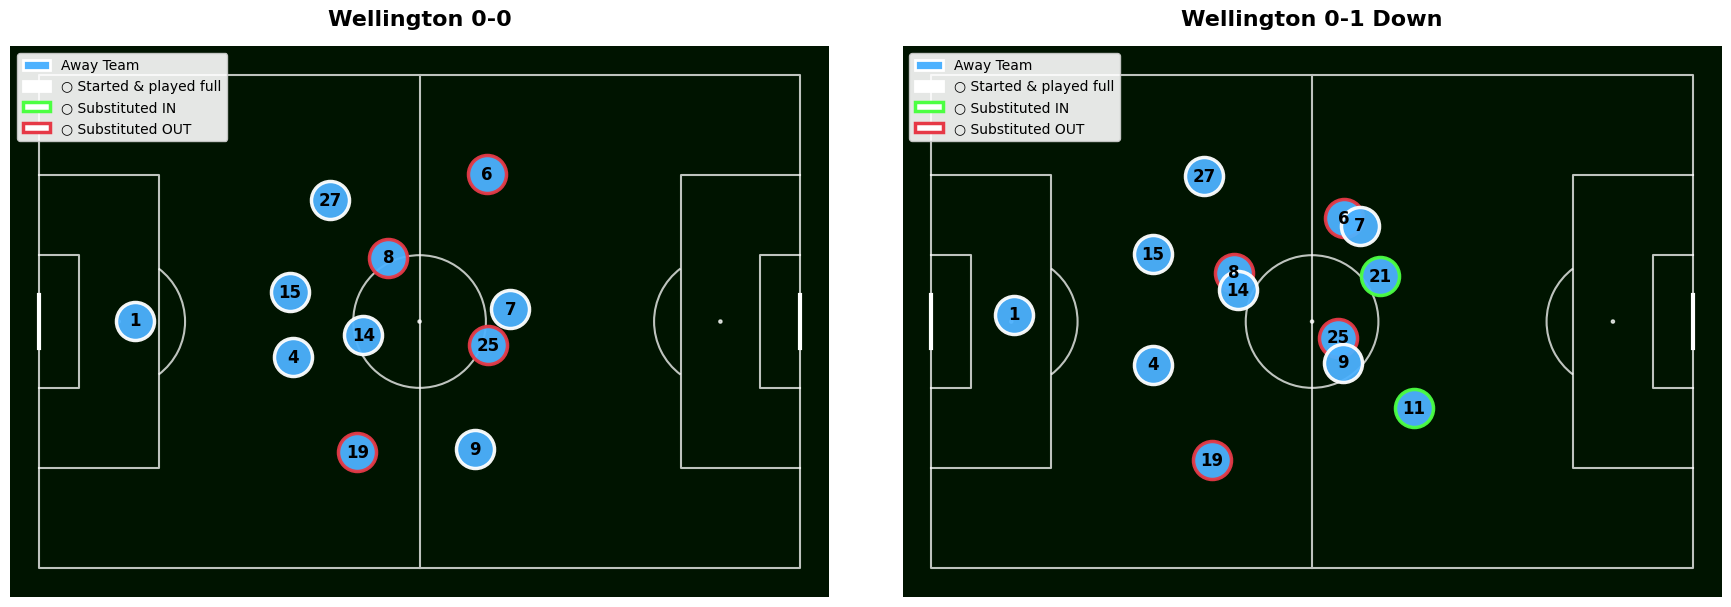

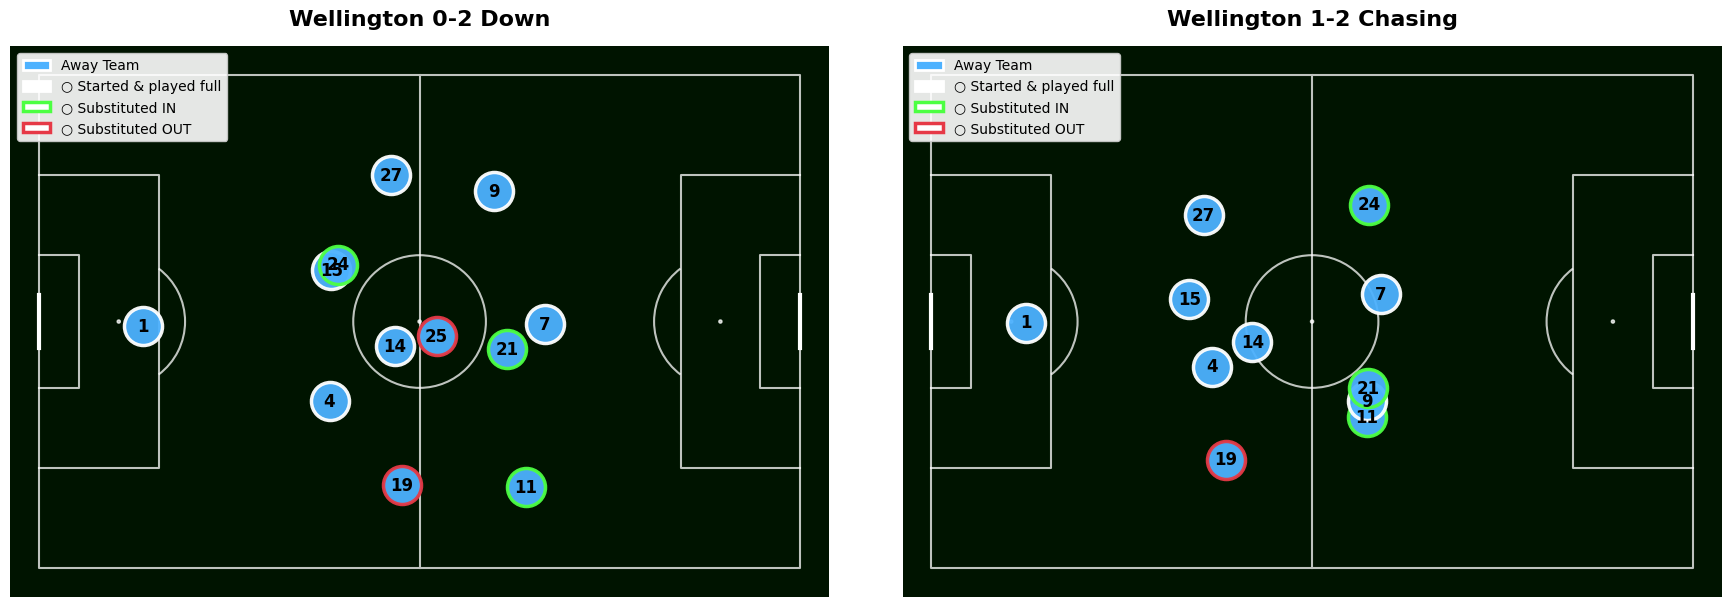

In [5]:
# Generate 3-panel visualization showing Wellington's progressive shape changes

# Calculate average player positions for each phase
positions_wel_0 = gs.average_positions(segment=wellington_baseline, team='away', match_id=match_id, possession='ip')
positions_wel_1 = gs.average_positions(segment=wellington_one_down, team='away', match_id=match_id, possession='ip')
positions_wel_2 = gs.average_positions(segment=wellington_two_down, team='away', match_id=match_id, possession='ip')
positions_wel_3 = gs.average_positions(segment=wellington_chasing, team='away', match_id=match_id, possession='ip')

# Create side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
gs.plot_average_positions(positions_df=positions_wel_0, title="Wellington 0-0", ax=ax1, ncols=2, nrows=1)
gs.plot_average_positions(positions_df=positions_wel_1, title="Wellington 0-1 Down", ax=ax2, ncols=2, nrows=1)
plt.tight_layout()
plt.show()

fig1, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
gs.plot_average_positions(positions_df=positions_wel_2, title="Wellington 0-2 Down", ax=ax3, ncols=2, nrows=1)
gs.plot_average_positions(positions_df=positions_wel_3, title="Wellington 1-2 Chasing", ax=ax4, ncols=2, nrows=1)
plt.tight_layout()
plt.show()

**Insight:** Wellington's tactical desperation escalates visibly. From 0-0 to 0-2, their width expands by 5 meters (38.4m → 43.1m) as they desperately stretch for attacking opportunities. When 0-2 down, they push their defensive line ~10 meters higher (-24.1m → -15.2m), taking substantial risks. This progressive expansion creates the exact spaces Auckland exploited with their wide attacks—Wellington's desperation played into Auckland's hands.

Even though they were able to pull one back, they didn't really have a solid structure to find the equalizer as they just through bodies forward leaving large gaps in midfield.

### Discovery 3: The Momentum Test

This is the critical test: when Wellington pulled one back (2-1), did momentum force Auckland into reactive chaos?

In [6]:
# The critical test: did Auckland stay composed or panic after Wellington scored?

# Define the two phases for comparison
comfortable = gs.segment_by_time_window(match_id=match_id, start_minute=31, end_minute=69)  # 1-0, 38 minutes
compact = gs.segment_by_time_window(match_id=match_id, start_minute=69, end_minute=81)      # 2-0, 12 minutes
nervous = gs.segment_by_time_window(match_id=match_id, start_minute=81, end_minute=90)      # 2-1, 9 minutes

# Calculate comprehensive metrics for comfortable phase
comp_comfortable = gs.team_compactness(segment=comfortable, team='home', match_id=match_id, possession='oop')
line_comfortable = gs.defensive_line_height(segment=comfortable, team='home', match_id=match_id, possession='oop')
chan_comfortable = gs.channel_progression(segment=comfortable, team='home', match_id=match_id)

# Calculate comprehensive metrics for compact phase
comp_compact = gs.team_compactness(segment=compact, team='home', match_id=match_id, possession='oop')
line_compact = gs.defensive_line_height(segment=compact, team='home', match_id=match_id, possession='oop')
chan_compact = gs.channel_progression(segment=compact, team='home', match_id=match_id)

# Calculate same metrics for nervous phase
comp_nervous = gs.team_compactness(segment=nervous, team='home', match_id=match_id, possession='oop')
line_nervous = gs.defensive_line_height(segment=nervous, team='home', match_id=match_id, possession='oop')
chan_nervous = gs.channel_progression(segment=nervous, team='home', match_id=match_id)

# Display the comparison
print("Auckland 1-0 Lead (Comfortable, 38 minutes):")
print(f"  Width: {comp_comfortable['width']:.1f}m | Depth: {comp_comfortable['depth']:.1f}m")
print(f"  Def Line: {line_comfortable['avg_defensive_line_x']:.1f}m")
print(f"  Channels - L:{chan_comfortable['left_pct']:.0f}% C:{chan_comfortable['center_pct']:.0f}% R:{chan_comfortable['right_pct']:.0f}%")

print("\nAuckland 2-0 Lead (Compact, 12 minutes):")
print(f"  Width: {comp_compact['width']:.1f}m | Depth: {comp_compact['depth']:.1f}m")
print(f"  Def Line: {line_compact['avg_defensive_line_x']:.1f}m")
print(f"  Channels - L:{chan_compact['left_pct']:.0f}% C:{chan_compact['center_pct']:.0f}% R:{chan_compact['right_pct']:.0f}%")

print("\nAuckland 2-1 Lead (Nervous, 9 minutes):")
print(f"  Width: {comp_nervous['width']:.1f}m | Depth: {comp_nervous['depth']:.1f}m")
print(f"  Def Line: {line_nervous['avg_defensive_line_x']:.1f}m")
print(f"  Channels - L:{chan_nervous['left_pct']:.0f}% C:{chan_nervous['center_pct']:.0f}% R:{chan_nervous['right_pct']:.0f}%")

Auckland 1-0 Lead (Comfortable, 38 minutes):
  Width: 31.4m | Depth: 29.9m
  Def Line: -14.6m
  Channels - L:39% C:28% R:33%

Auckland 2-0 Lead (Compact, 12 minutes):
  Width: 36.2m | Depth: 24.8m
  Def Line: -20.3m
  Channels - L:8% C:10% R:82%

Auckland 2-1 Lead (Nervous, 9 minutes):
  Width: 31.4m | Depth: 30.6m
  Def Line: -17.2m
  Channels - L:48% C:19% R:34%


```
Auckland 1-0 Lead (Comfortable, 38 minutes):
  Width: 31.4m | Depth: 29.9m
  Def Line: -14.6m
  Channels - L:39% C:28% R:33%

Auckland 2-0 Lead (Compact, 12 minutes):
  Width: 36.2m | Depth: 24.8m
  Def Line: -20.3m
  Channels - L:8% C:10% R:82%

Auckland 2-1 Lead (Nervous, 9 minutes):
  Width: 31.4m | Depth: 30.6m
  Def Line: -17.2m
  Channels - L:48% C:19% R:34%
```

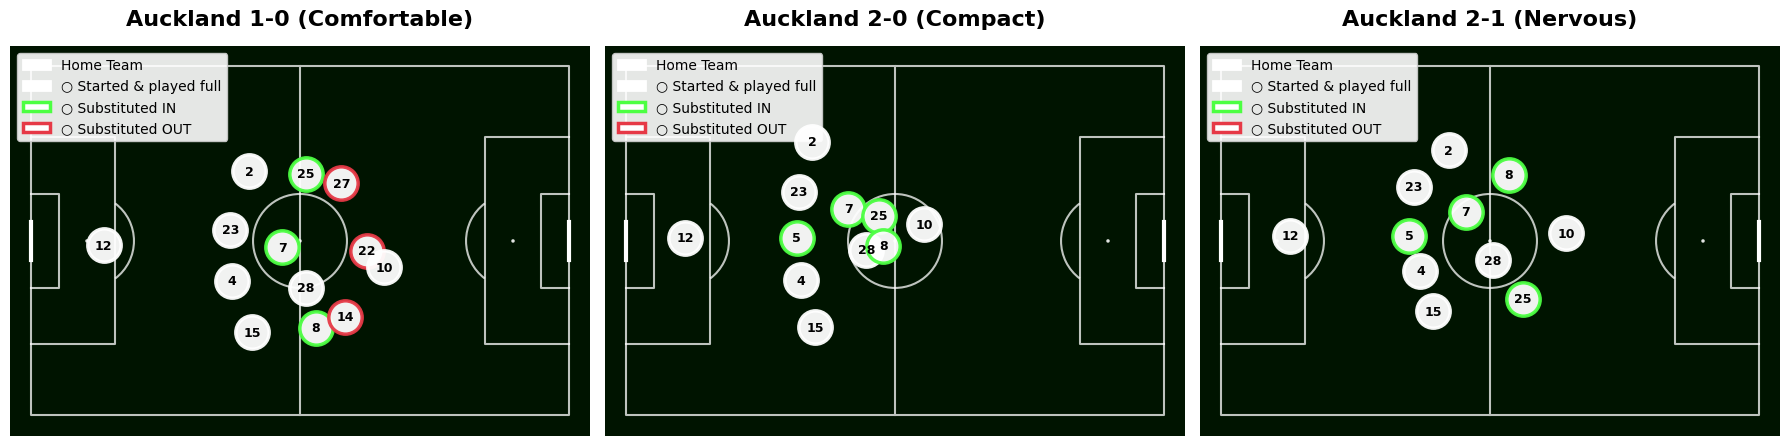

In [7]:
# Visualize the dramatic shape change - the moment of truth

# Get average positions for both phases
positions_comfortable = gs.average_positions(segment=comfortable, team='home', match_id=match_id, possession='oop')
positions_compact = gs.average_positions(segment=compact, team='home', match_id=match_id, possession='oop')
positions_nervous = gs.average_positions(segment=nervous, team='home', match_id=match_id, possession='oop')

# Create side-by-side comparison showing composed vs panicked shape
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
gs.plot_average_positions(positions_df=positions_comfortable, title="Auckland 1-0 (Comfortable)", ax=ax1, ncols=3, nrows=1)
gs.plot_average_positions(positions_df=positions_compact, title="Auckland 2-0 (Compact)", ax=ax2, ncols=3, nrows=1)
gs.plot_average_positions(positions_df=positions_nervous, title="Auckland 2-1 (Nervous)", ax=ax3, ncols=3, nrows=1)
plt.tight_layout()
plt.show()

**The verdict:** Auckland did NOT stay composed. Their carefully constructed shape collapsed. They shifted to a 5-at-the-back formation after going 2-0 up and invited pressure which eventually led to Wellington's goal. Their defensive line dropped another 6 meters deeper (-14.6m → -20.3m). AFter going 2-1 down, Auckland's compact defensive structure in the midfield was more strecthed than they would have liked, but they managed to hold on for the win.

This validates the opening premise perfectly: momentum swings can force even winning teams into chaotic responses. Auckland went from controlled dominance to survival mode in the span of one goal. Looking back thye would feel that they could have managed the game far better in the latter stages.

### What Else Can Be Discovered

This 5-minute analysis revealed four tactical patterns. The toolkit enables much deeper investigation:

**Possession Context Analysis:**
- How did Auckland's width differ when attacking (IP) vs defending (OOP) in each phase?
- Did Wellington's desperation show more in their attacking or defensive shape?
- Compare team compactness in-possession versus out-of-possession across game states

**Tactical Phase Filtering:**
- Isolate build-up patterns from the defensive third when winning
- Compare high press attempts when 0-2 down versus when drawing
- Track transition moments immediately after losing possession
- Analyze final third entries across different game states

**Time-Based Patterns:**
- Compare first 15 minutes versus final 15 minutes of each phase
- Analyze 5-minute windows around each goal for immediate responses
- Track halftime adjustments (0-45 min vs 45-90 min)

**Compositional Analysis:**
- "Defensive third build-up when winning while in possession"
- "High defensive line when losing while out of possession"
- Stack any combination: game state + possession context + tactical phase + time window
- Create custom scenarios matching specific coaching questions

**Visualization Options:**
- Every metric calculated can be visualized—defensive line height evolution, channel progression changes, compactness heatmaps
- Generate publication-ready plots for any filtered segment
- Create side-by-side comparisons across game states, teams, or time periods

The toolkit's compositional design means any tactical question becomes a filter combination—no new code required, just different function chains.

## 4. Conclusion

This toolkit transforms game state analysis from hours of manual video review to minutes of code. The Auckland-Wellington demonstration revealed tactical patterns invisible in whole-match averages: Auckland's coached depth adjustment when ahead, Wellington's progressive desperation, and most tellingly, Auckland's reactive disjointness after conceding—validating that momentum swings affect even winning teams.

The core innovation is compositional filtering. Questions don't require new features—they become filter combinations. "How does Team X build up from the defensive third when losing while in possession?" is three function calls. Analysts can investigate any tactical scenario by stacking game state, possession context, tactical phase, and time filters.

Built on kloppy TrackingDataset objects, the toolkit integrates seamlessly into existing PySport workflows. All capabilities demonstrated here—segmentation, metrics, visualizations—work with any match in the SkillCorner dataset.

The tool doesn't prescribe what teams "should" do. It reveals what they actually do, enabling analysts to discover patterns rather than validate assumptions.

---

**Submission for SkillCorner × PySport Analytics Cup**  
**Repository:** [github.com/hamza-shakir/analytics_cup_analyst](https://github.com/hamza-shakir/analytics_cup_analyst)